# CAPSTONE PROJECT - THE BATTLE OF NEIGHBORHOODS
    
    
    
# Introduction & Business Problem :

New Delhi is the capital of India. It is part of the town of Delhi’s eleven districts. The city itself has a populace of 257,803. However, the large metro location has a populace that exceeds 26 million. New Delhi is used interchangeably to consult the National Capital Territory of Delhi (NCT). The official language of New Delhi and the one this is most broadly spoken is Hindi. Nevertheless, English is also spoken as a language within corporations and many agencies. Over the final decades, it is continuously growing due to the metropolis’s vital role in authorities and business. With its diverse culture, there is an diversity in the variety of food provided in New Delhi. Lots of restaurants are available which cater to different tastes of the New Delhi population.  They vary in cuisines, décor, services and ambience. Most of them can be categorized based on their cuisines such as Chinese, Italian, French, etc.

- Here we have categorized the restaurants based on Data Cluster Algorithm: 




# Questions that can be asked using the above mentioned datasets

1. What is the best location in New Delhi City for Chinese Cuisine?
2. What is the best location in New Delhi City for Cafe and Pizza?
3. Which areas have a large number of Chinese Restaurant Market?
4. Which location has the best night clubs in New Delhi City?
5. Which is the best tourist place in New Delhi City
6. Which areas have less number of the restaurant?
7. Which is the best place to stay if I prefer Chinese Cuisine?
8. What places have the best restaurants in New Delhi?


# Data

## The following data will be used for the project :

- New Delhi Restaurant data that contains list Locality, Restaurant name, Rating along with their latitude and longitude. 
    - Data source : https://www.kaggle.com/shrutimehta/zomato-restaurants-data 
- Description: This data set contains the required information. And we will use this data set to explore various locality of the new Delhi city. 
    - Data source: https://developer.foursquare.com/ 
- Description: By using this API we will get all the venues in each neighborhood.


# Approach
- Collect the new Delhi city data from https://www.kaggle.com/shrutimehta/zomatorestaurants-data 
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using an aggregative rating for each restaurant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!pip install geocoder
import geocoder
print('libraries Imported')

libraries Imported


### Lets read the zomato resturant data from csv file

In [2]:
pwd

'C:\\Users\\Hp\\Data Science\\Clustering neighbourhood'

In [3]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df.shape

(9551, 21)

### Lets take the data of India

In [5]:
df_india = df[df['Country Code'] == 1]
df_india.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...            Currency Has Table booking Has Online delivery  \
624  ...  Indian Rupees(Rs.)                No                  No   
625  ...  Indian Rupees(Rs.)                No                  No   
626  ...  Indian Rupees(Rs.)                No                  No   
627  ...  Indian Rupees(Rs.)                No                  No   
628  ...  Indian Rupees(Rs.)                No                  No   

    Is delivering now Switch to order menu Price range  Aggregate rating  \
624                No                   No           3               3.9   
625                No                   No           2               3.5   
626                No                   No           2               3.6   
627                No                   No           2               4.0   
628                No                   No           3               4.2   

     Rating color Rating text Votes  
624        Yellow        Good   140  
625        Yellow        Good    71  
626        Yellow        Good    94  
627         Green   Very Good    87  
628         Green   Very Good   177  

[5 rows x 21 columns]

In [6]:
df_india.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Lets take the data of New Delhi 

In [7]:
df_NDLS = df_india[df_india['City'] =='New Delhi']
df_NDLS.reset_index(drop =True,inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [8]:
df_NDLS.shape

(5473, 21)

### Now that we have the data of New Delhi, let's start cleaning our data

remove the unwanted columns and rows from dataset

In [9]:
df_NDLS.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df_Res = df_NDLS[df_NDLS.Longitude != 0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [11]:
df_Res = df_Res[df_Res['Aggregate rating']!= 0.0]

In [12]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### Now we have our proper data

## Now let's create a map to show the restaurant clusters

In [13]:
New_Delhi_Rest = folium.Map(location=[28.535382,77.196923],zoom_start=15)
X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans =KMeans(n_clusters=5, random_state=0).fit(Z)
clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [14]:
pwd

'C:\\Users\\Hp\\Data Science\\Clustering neighbourhood'

In [15]:
New_Delhi_Rest.save('map.png')

In [16]:
New_Delhi_Rest.save('New Delhi Map.html')

In [17]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## Let's see the locality with the higest rating

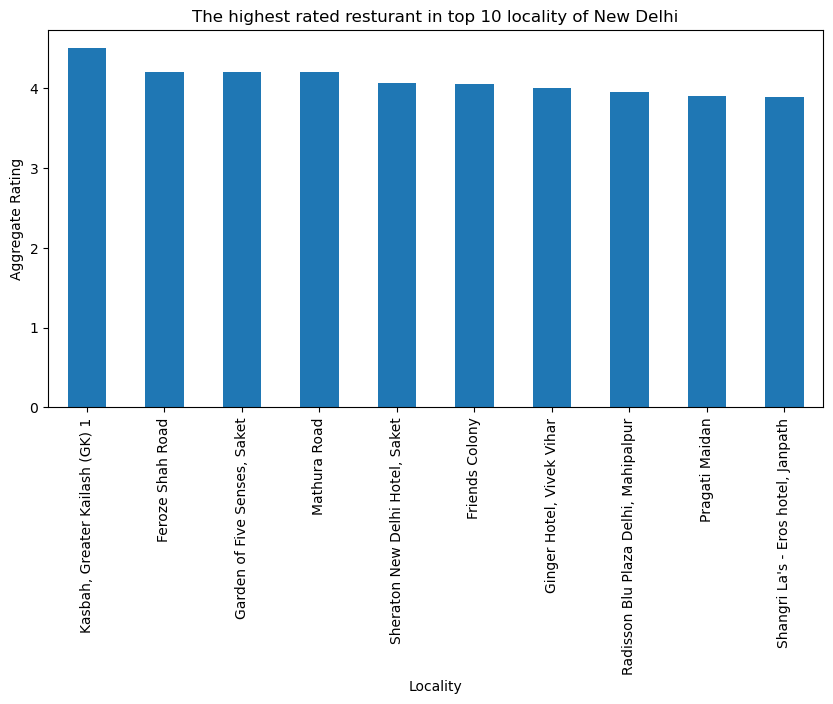

In [18]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The highest rated resturant in top 10 locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind = 'bar')
plt.show()

#### The top rated restarants are in Kasbah, Greater Kailash area.

## Let's see the locality with the lowest rating

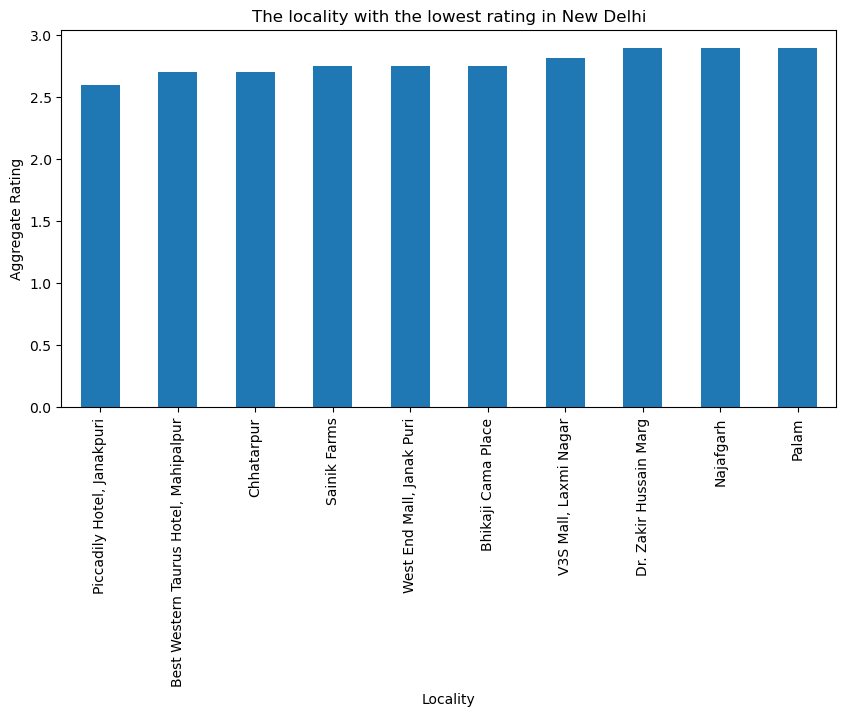

In [19]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The locality with the lowest rating in New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Aggregate Rating')
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind = 'bar')
plt.show()

### The worst restarants are in Piccadily Hotel, Janakpuri.

## Let's see the highest number of restaurents in the locality of New Delhi

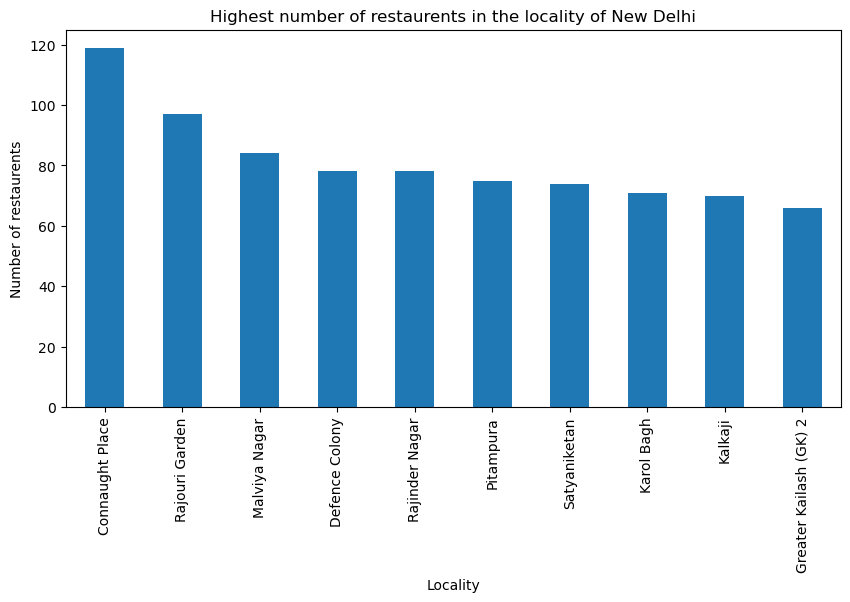

In [20]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('Highest number of restaurents in the locality of New Delhi')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of restaurents')
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind = 'bar')
plt.show()

## Which is the best places for chinese restaurant in New Delhi

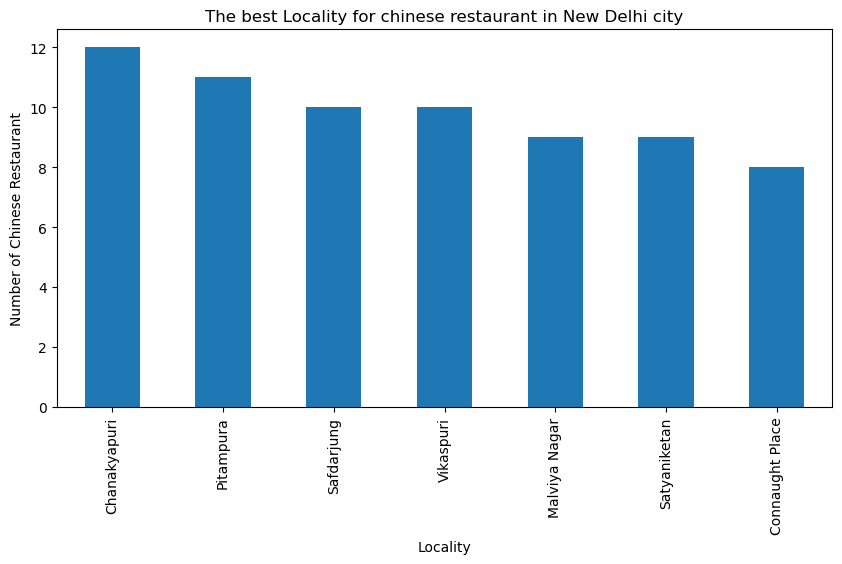

In [21]:
plt.figure(figsize=(10,5),dpi = 100)

plt.title('The best Locality for chinese restaurant in New Delhi city')
plt.xlabel('Resturant Locality in New Delhi')
plt.ylabel('Number of Chinese Restaurant') 

df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(7).plot(kind = 'bar')

plt.show()

### Chanakyapuri is the best place for Chinese restaurant.

## Let's see which chinese restaurent has a good rating

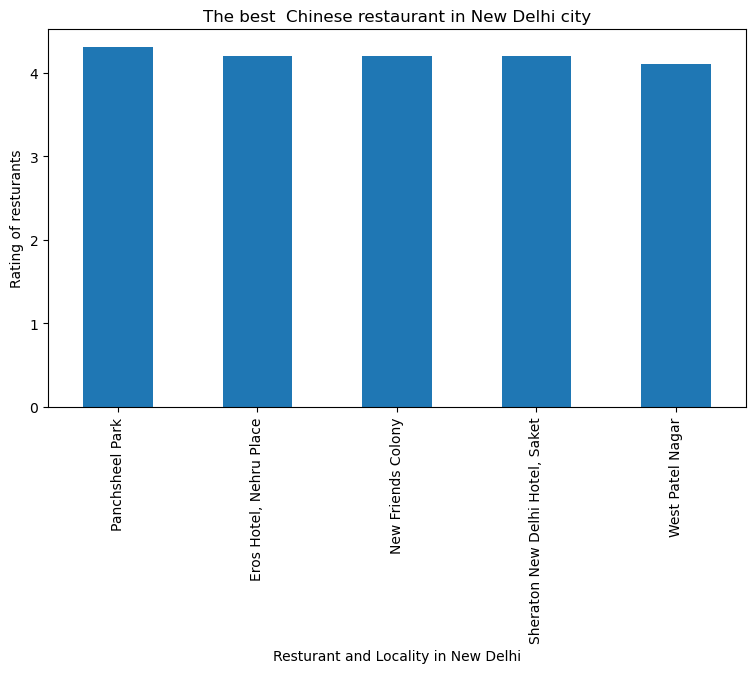

In [22]:
plt.figure(figsize=(9,5), dpi = 100)

plt.title('The best  Chinese restaurant in New Delhi city')



df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant and Locality in New Delhi')

plt.ylabel('Rating of resturants')

plt.show()


### Panchsheel park is best Chinese resturants.

## Grouping the data based on the Locality

In [23]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [24]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']

In [25]:
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [26]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'K1LZA3U1MYZXQME3KWXDZMJ0GMPWLMKYJHTULRAPM4W5CI1L' # Foursquare ID 

CLIENT_SECRET = 'L1EL0ED3LXFTY5DQCJSJSBRGBEIFSUWPCYSSRQUACXQY3GIB' # Foursquare Secret
VERSION = '20200709' # Foursquare API version

## Function to get all the Locality in New Delhi

In [28]:
# Function to get all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)






### Find all the venues in New Delhi Locality

In [33]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )


ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [34]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [35]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 15                  15     15   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          28                  28     28   
Yusuf Sarai                                    12                  12     12   
ibis New Delhi, Aerocity                       26                  26     26   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              15               15   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       28               28   
Yusuf Sarai                                 12               12   
ibis New Delhi, Aerocity                    26               26   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              15  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       28  
Yusuf Sarai                                 12  
ibis New Delhi, Aerocity                    26  

[239 rows x 6 columns]

In [36]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 217 uniques categories.


In [37]:
## Analysing Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Toy / Game Store  Trail  \
0                 0                    0  ...                 0      0   
1                 0                    0  ...                 0      0   
2                 0                    0  ...                 0      0   
3                 0                    0  ...                 0      0   
4                 0                    0  ...                 0      0   

   Train Station  Turkish Restaurant  Udupi Restaurant  \
0              0                   0                 0   
1              0                   0                 0   
2              0                   0                 0   
3              0                   0                 0   
4              0                   0                 0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0                      0           0   
1                              0                      0           0   
2                              0                      0           0   
3                              0                      0           0   
4                              0                      0           0   

   Wings Joint  Women's Store  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 218 columns]

In [38]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
234  West Gate Mall, Rajouri Garden  0.000000           0.000000   
235                West Patel Nagar  0.000000           0.000000   
236           Worldmark 1, Aerocity  0.000000           0.035714   
237                     Yusuf Sarai  0.000000           0.000000   
238        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Lounge  \
0                  0.0                 0.0      0.0        0.000000   
1                  0.0                 0.0      0.0        0.000000   
2                  0.0                 0.0      0.0        0.000000   
3                  0.0                 0.0      0.0        0.142857   
4                  0.0                 0.0      0.0        0.000000   
..                 ...                 ...      ...             ...   
234                0.0                 0.0      0.0        0.000000   
235                0.0                 0.0      0.0        0.000000   
236                0.0                 0.0      0.0        0.000000   
237                0.0                 0.0      0.0        0.000000   
238                0.0                 0.0      0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  \
0                0.0          0.000000             0.000000  ...   
1                0.0          0.000000             0.000000  ...   
2                0.0          0.000000             0.000000  ...   
3                0.0          0.142857             0.000000  ...   
4                0.0          0.000000             0.000000  ...   
..               ...               ...                  ...  ...   
234              0.0          0.000000             0.066667  ...   
235              0.0          0.000000             0.000000  ...   
236              0.0          0.000000             0.000000  ...   
237              0.0          0.000000             0.000000  ...   
238              0.0          0.000000             0.000000  ...   

     Toy / Game Store  Trail  Train Station  Turkish Restaurant  \
0                 0.0    0.0       0.000000                 0.0   
1                 0.0    0.0       0.000000                 0.0   
2                 0.0    0.0       0.000000                 0.0   
3                 0.0    0.0       0.000000                 0.0   
4                 0.0    0.0       0.000000                 0.0   
..                ...    ...            ...                 ...   
234               0.0    0.0       0.000000                 0.0   
235               0.0    0.0       0.000000                 0.0   
236               0.0    0.0       0.035714                 0.0   
237               0.0    0.0       0.000000                 0.0   
238               0.0    0.0       0.038462                 0.0   

     Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0.0                            0.0                    0.0   
1                 0.0                            0.0                    0.0   
2                 0.0                            0.0                    0.0   
3                 0.0                            0.0                    0.0   
4                 0.0                            0.0                    0.0   
..                ...                            ...                    ...   
234               0.0                            0.0                    0.0   
235               0.0                            0.0                    0.0   
236               0.0   

In [39]:
New_Delhi_grouped.shape

(239, 218)

In [40]:

## printing each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Pizza Place  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant   0.4
1               Café   0.4
2                Pub   0.2
3                ATM   0.0
4             Office   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1  Indian Restaurant   0.2
2        Pizza Place   0.2
3      Shopping Mall   0.2
4               Café   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2          Coffee Shop  0.14
3       Airport Lounge  0.14
4     Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0         Pizza Place  0.25
1    Department Store  0.25
2     Bed & Breakfast  0.25
3  Chinese Restaurant  0.25
4                 ATM  0.00


----Aggarwal C

               venue  freq
0  Indian Restaurant  0.25
1      Train Station  0.25
2             Market  0.25
3         Restaurant  0.25
4                ATM  0.00


----Dilshad Garden----
       venue  freq
0  Juice Bar  0.33
1        Gym  0.33
2     Market  0.33
3        ATM  0.00
4     Office  0.00


----District Centre, Janakpuri----
                  venue  freq
0     Indian Restaurant  0.19
1        Sandwich Place  0.12
2    Chinese Restaurant  0.12
3  Gym / Fitness Center  0.06
4                 Hotel  0.06


----Dr. Zakir Hussain Marg----
                venue  freq
0   Indian Restaurant  0.25
1  Italian Restaurant  0.17
2         Golf Course  0.17
3                Café  0.08
4   Convenience Store  0.08


----East Patel Nagar----
             venue  freq
0      Pizza Place  0.14
1      Coffee Shop  0.07
2  Bed & Breakfast  0.07
3     Liquor Store  0.07
4       Donut Shop  0.07


----East of Kailash----
                  venue  freq
0  Fast Food Restaurant  0.14
1   Indie Movie Th

                  venue  freq
0  Fast Food Restaurant  0.19
1           Pizza Place  0.12
2                   Bar  0.06
3       Bed & Breakfast  0.06
4    Light Rail Station  0.06


----Jaypee Vasant Continental, Vasant Vihar----
                venue  freq
0                Café  0.14
1  Chinese Restaurant  0.07
2         Coffee Shop  0.07
3          Restaurant  0.07
4         Pizza Place  0.07


----Jor Bagh----
               venue  freq
0  Indian Restaurant  0.25
1        Record Shop  0.25
2      Metro Station  0.25
3             Bakery  0.25
4                ATM  0.00


----Kailash Colony----
                venue  freq
0  Light Rail Station  0.11
1        Dessert Shop  0.11
2                 Bar  0.11
3               Hotel  0.11
4   Indian Restaurant  0.11


----Kalkaji----
                  venue  freq
0                Market  0.17
1  Fast Food Restaurant  0.17
2     Indian Restaurant  0.08
3            Food Truck  0.08
4        Sandwich Place  0.08


----Kamla Nagar----
        

4      Asian Restaurant   0.2


----Model Town 1----
                venue  freq
0           Pool Hall   0.2
1          Playground   0.2
2  Light Rail Station   0.2
3   Convenience Store   0.2
4          Food Truck   0.2


----Model Town 2----
                  venue  freq
0            Donut Shop  0.17
1  Fast Food Restaurant  0.17
2    Frozen Yogurt Shop  0.17
3        Ice Cream Shop  0.17
4           Coffee Shop  0.17


----Model Town 3----
                         venue  freq
0            Indian Restaurant  0.33
1                         Park  0.33
2                Historic Site  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Moments Mall, Kirti Nagar----
                 venue  freq
0        Metro Station  0.15
1        Shopping Mall  0.08
2           Sports Bar  0.08
3           Donut Shop  0.08
4  Fried Chicken Joint  0.08


----Moti Bagh----
                     venue  freq
0  South Indian Restaurant  0.25
1              Pizza Place  0.25
2 

               venue  freq
0          Multiplex  0.15
1        Coffee Shop  0.15
2    Thai Restaurant  0.08
3  Convenience Store  0.08
4  Electronics Store  0.08


----Sarita Vihar----
    venue  freq
0    Café  0.75
1  Arcade  0.25
2     ATM  0.00
3  Office  0.00
4  Museum  0.00


----Sarojini Nagar----
                         venue  freq
0         Fast Food Restaurant   0.4
1                  Snack Place   0.2
2                  Pizza Place   0.2
3            Indian Restaurant   0.2
4  Northeast Indian Restaurant   0.0


----Satyaniketan----
           venue  freq
0           Café  0.43
1          Plaza  0.14
2  Deli / Bodega  0.14
3         Bistro  0.14
4    Snack Place  0.14


----Sector 15, Dwarka----
                venue  freq
0  Light Rail Station   0.5
1       Train Station   0.5
2                 ATM   0.0
3              Office   0.0
4           Multiplex   0.0


----Select Citywalk Mall, Saket----
               venue  freq
0  Indian Restaurant  0.12
1               Café  0

4  Fast Food Restaurant  0.07


----Vijay Nagar----
                venue  freq
0                Café  0.17
1  Italian Restaurant  0.08
2              Bakery  0.08
3         Coffee Shop  0.08
4    Asian Restaurant  0.08


----Vikas Marg----
           venue  freq
0            ATM  0.25
1   Burger Joint  0.25
2  Burrito Place  0.25
3           Café  0.25
4           Pool  0.00


----Vikaspuri----
                  venue  freq
0           Pizza Place  0.25
1           Beer Garden  0.25
2  Fast Food Restaurant  0.25
3        Ice Cream Shop  0.25
4                   ATM  0.00


----Vivek Vihar----
                venue  freq
0           Juice Bar  0.33
1  Athletics & Sports  0.17
2           Gift Shop  0.17
3    Department Store  0.17
4     Bed & Breakfast  0.17


----Wazirpur----
               venue  freq
0  Mobile Phone Shop   1.0
1                ATM   0.0
2             Office   0.0
3             Museum   0.0
4        Music Store   0.0


----West End Mall, Janak Puri----
              

In [43]:
## making that into a pandas dataframe
## First, writing a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
## creating the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted.head()

Locality 1st Most Common Venue 2nd Most Common Venue  \
0       ARSS Mall, Paschim Vihar     Indian Restaurant                   ATM   
1                        Adchini     Indian Restaurant                  Café   
2  Aditya Mega Mall, Karkardooma           Pizza Place         Shopping Mall   
3                       Aerocity                 Hotel           Coffee Shop   
4  Aggarwal City Mall, Pitampura           Pizza Place      Department Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Market           Coffee Shop    Chinese Restaurant   
1                   Pub         Women's Store                  Food   
2     Indian Restaurant             Multiplex                 Hotel   
3        Airport Lounge   Rental Car Location  Fast Food Restaurant   
4       Bed & Breakfast    Chinese Restaurant     Food & Drink Shop   

  6th Most Common Venue           7th Most Common Venue 8th Most Common Venue  \
0        Sandwich Place  Multicuisine Indian Restaurant           Pizza Place   
1         Garden Center                          Garden           Gaming Cafe   
2                  Café                            Food           Gaming Cafe   
3      Airport Terminal          Furniture / Home Store    Frozen Yogurt Shop   
4             Gastropub                   Garden Center                Garden   

    9th Most Common Venue  10th Most Common Venue  
0               Hotel Bar  Furniture / Home Store  
1  Furniture / Home Store      Frozen Yogurt Shop  
2  Furniture / Home Store      Frozen Yogurt Shop  
3                    Food     Fried Chicken Joint  
4             Gaming Cafe  Furniture / Home Store

In [45]:

## Cluster Locality
## Running k-means to cluster the Locality into 5 clusters.

# setting number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [46]:
# adding clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merging New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-46-786e8ea7cd2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               1   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               1   
3                         Average           59               2   
4                         Average          126               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                  Café                   Pub   
2           Pizza Place         Shopping Mall     Indian Restaurant   
3                 Hotel           Coffee Shop        Airport Lounge   
4           Pizza Place      Department Store       Bed & Breakfast   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1         Women's Store                  Food         Garden Center   
2             Multiplex                 Hotel                  Café   
3   Rental Car Location  Fast Food Restaurant      Airport Terminal   
4    Chinese Restaurant     Food & Drink Shop             Gastropub   

            7th Most Common Venue 8th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place   
1                          Garden           Gaming Cafe   
2                            Food           Gaming Cafe   
3          Furniture / Home Store    Frozen Yogurt Shop   
4                   Garden Center                Garden   

    9th Most Common Venue  10th Most Common Venue  
0               Hotel Bar  Furniture / Home Store  
1  Furniture / Home Store      Frozen Yogurt Shop  
2  Furniture / Home Store      Frozen Yogurt Shop  
3                    Food     Fried Chicken Joint  
4             Gaming Cafe  Furniture / Home Store

# **Let's separate all the cluster data**

In [47]:
cluster0 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==0]
cluster0.to_csv('cluster0.csv')

In [48]:
cluster1 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==1]
cluster1.to_csv('cluster1.csv')

In [49]:
cluster2 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==2]
cluster2.to_csv('cluster2.csv')

In [50]:
cluster3 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==3]
cluster3.to_csv('cluster3.csv')

In [51]:
cluster4 = New_Delhi_merged[New_Delhi_merged['Cluster Labels']==4]
cluster4.to_csv('cluster4.csv')

# **final map**

In [52]:
# creating final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,icon=folium.Icon(icon='cloud'),
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
map_clusters.save('final map.html')

## Examine Clusters


### Cluster 0


In [54]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
16   28.630440    3.208333                  Average, Good, Poor         1779   
..         ...         ...                                  ...          ...   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
231  28.637492    3.062264                  Average, Good, Poor         1253   
234  28.630044    2.750000                        Average, Poor          238   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6                 0                Market     Food & Drink Shop   
7                 0           Coffee Shop    Italian Restaurant   
8                 0                  Café               Stadium   
9                 0                  Café                   ATM   
16                0                Bakery     Indian Restaurant   
..              ...                   ...                   ...   
228               0                   NaN                   NaN   
229               0                  Café    Italian Restaurant   
231               0           Pizza Place           Beer Garden   
234               0     Indian Restaurant    Chinese Restaurant   
237               0                 Hotel     Indian Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6          Cosmetics Shop            Steakhouse           Coffee Shop   
7    Fast Food Restaurant        Clothing Store         Shopping Mall   
8           Metro Station          Dessert Shop           Golf Course   
9            Burger Joint         Burrito Place            Food Court   
16                  Hotel               Theater                  Café   
..                    ...                   ...                   ...   
228                   NaN                   NaN                   NaN   
229      Asian Restaurant  Fast Food Restaurant           Coffee Shop   
231        Ice Cream Shop  Fast Food Restaurant                  Food   
234        Sandwich Place  Fast Food Restaurant           Coffee Shop   
237       Bed & Breakfast           Coffee Shop    Italian Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6    New American Restaurant         Garden Center                Garden   
7           Asian Restaurant                  Café     Indian Restaurant   
8                Coffee Shop           Music Venue                 Hotel   
9              Garden Center                Garden           Gaming Cafe   
16                    Arcade             Nightclub           Art Gallery   
..                       ...                   ...                   ...   
228                      NaN                   NaN                   NaN   
229               Restaurant    Chinese Restaurant           Cheese Shop   
231            Garden Center                Garden           Gaming Cafe   
234       Light Rail Station             BBQ Joint  Gym / Fitness Center   
237       Light Rail Station             Gastropub         Shopping Mall   

      9th Most Common Venue  10th Most Common Venue  
6               Gaming Cafe  Furniture / Home Store  
7        Chinese Restaurant                     Bar  
8      Other Great Outdoors              Food Court  
9    Furniture / Home Store      Frozen Yogurt Shop  
16                Hotel Bar       Food & Drink Shop  
..                      ...                     ...  
228                     NaN                     NaN  
229                  Ba

### cluster 1

In [55]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                   Average, Good          434   
12   28.641698    3.050000                         Average           17   
13   28.690182    3.090000             Average, Good, Poor          971   
23   28.656414    3.358182        Average, Good, Very Good         6668   
26   28.538688    3.130303             Average, Good, Poor         2578   
33   28.657388    3.320000                   Average, Good          636   
42   28.576161    2.983333             Average, Good, Poor          542   
43   28.643320    3.287500  Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000             Average, Good, Poor         1106   
48   28.630149    2.950000             Average, Good, Poor          471   
49   28.602169    2.900000                         Average            7   
55   28.617102    4.200000                       Very Good         3010   
61   28.668181    3.400000                         Average           33   
65   28.556980    3.272414             Average, Good, Poor         5243   
66   28.699373    3.252174                   Average, Good          973   
71   28.641003    3.650000                   Average, Good          367   
76   28.576785    3.200000                   Average, Good          143   
77   28.631728    3.060714  Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500             Average, Good, Poor          609   
84   28.630942    3.122000  Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111        Average, Good, Very Good         7411   
92   28.584294    3.100000                         Average           35   
97   28.662972    3.533333              Average, Very Good          293   
99   28.648795    3.238028  Average, Good, Poor, Very Good         7282   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                         Average          817   
116  28.486576    2.950000                         Average            8   
118  28.646549    3.200000                         Average           20   
124  28.521760    4.200000                       Very Good          278   
126  28.602860    2.973214             Average, Good, Poor         1831   
133  28.708185    3.344444        Average, Good, Very Good          568   
140  28.627959    3.004167                         Average          326   
144  28.591092    3.200000             Average, Good, Poor          993   
153  28.608055    3.860000        Average, Good, Very Good         7978   
156  28.630734    3.185714                   Average, Good          244   
160  28.712975    3.066667                         Average          121   
165  28.539464    2.900000                         Average           14   
199  28.601779    3.700000        Average, Good, Very Good          964   
202  28.646593    3.280952        Average, Good, Very Good         1624   
204  28.597038    3.533333        Average, Good, Very Good          902   
209  28.631362    3.537500                   Average, Good         1666   
210  28.661133    3.775000                 Good, Very Good          460   
211  28.579556    3.780000                            Good          709   
212  28.592147    3.350000                   Average, Good          189   
215  28.605069    3.785714        Average, Good, Very Good         1976   
223  28.619954    2.905714                   Average, Poor          242   

     Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
0                 1     Indian Restaurant                            ATM   
1                 1     Indian Restaurant                           Café   
2                 1           Pizza Place                  Shopping Mall   
12                1     Indian 

### cluster 2

In [56]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels    1st Most Common Venue     2nd Most Common Venue  \
3                 2                    Hotel               Coffee Shop   
10                2                    Hotel         Indian Restaurant   
19                2                    Hotel        Italian Restaurant   
25                2      Japanese Restaurant         Indian Restaurant   
35                2                    Hotel                    Arcade   
56                2                    Hotel          Sculpture Garden   
60                2                    Hotel          Asian Restaurant   
69                2                    Hotel         Indian Restaurant   
70                2                    Hotel                Restaurant   
72                2                   Garden        Light Rail Station   
74                2                    Hotel         Indian Restaurant   
83                2                    Hotel         Indian Restaurant   
111               2                    Hotel         Indian Restaurant   
112               2                    Hotel         Indian Restaurant   
119               2                    Hotel                 Hotel Bar   
128               2  Health & Beauty Service                     Hotel   
149               2                    Hotel         Indian Restaurant   
162               2                     Café                     Hotel   
163               2                    Hotel         Indian Restaurant   
168               2                    Hotel         Indian Restaurant   
169               2                    Hotel         Ind

### cluster 3

In [57]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating             Comments  No_of_Votes  Cluster Labels  \
146  28.535040    3.175000        Average, Good           60               3   
232  28.667344    3.077273  Average, Good, Poor          939               3   

       1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
146  Health & Beauty Service     Mobile Phone Shop         Women's Store   
232                Juice Bar             Gift Shop      Department Store   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
146           Golf Course             Gastropub         Garden Center   
232       Bed & Breakfast    Athletics & Sports     Food & Drink Shop   

    7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
146                Garden           Gaming Cafe  Furniture / Home Store   
232             Gastropub         Garden Center                  Garden   

    10th Most Common Venue  
146     Frozen Yogurt Shop  
232            Gaming Cafe

### cluster 4

In [58]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
4    28.690020    3.033333                              Average          126   
5    28.700516    3.040000                  Average, Good, Poor          594   
11   28.562580    3.750000             Average, Good, Very Good          875   
14   28.693969    3.378571                        Average, Good         2343   
15   28.691136    3.390909             Average, Good, Very Good          485   
18   28.696302    3.300000                        Average, Good          415   
22   28.654105    3.085714                              Average           80   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
36   28.692546    3.480000                        Average, Good          948   
50   28.645084    3.235000       Average, Good, Poor, Very Good         2578   
51   28.557166    3.080000                   Average, Very Good         1120   
52   28.551417    3.505000             Average, Good, Very Good         7446   
53   28.549856    3.720000             Average, Good, Very Good          352   
57   28.699837    3.376471             Average, Good, Very Good         2460   
73   28.643036    3.000000                              Average            7   
87   28.582031    3.117143       Average, Good, Poor, Very Good         2140   
90   28.642755    3.450000                        Average, Good          322   
94   28.538153    3.117143                  Average, Good, Poor         3642   
95   28.681154    3.453448             Average, Good, Very Good         5267   
98   28.651527    3.490909             Average, Good, Very Good         3222   
101  28.667644    3.300000                              Average          132   
103  28.652501    3.080000                  Average, Good, Poor         2196   
104  28.656263    3.097619                        Average, Good          965   
106  28.575525    3.126316                        Average, Good          998   
107  28.569394    3.252381                        Average, Good         1525   
130  28.724100    3.133333                              Average          325   
132  28.706295    3.256000             Average, Good, Very Good         1717   
136  28.658244    3.240000                        Average, Good          567   
138  28.556145    3.040909                  Average, Good, Poor          637   
141  28.549169    3.196000       Average, Good, Poor, Very Good         2715   
142  28.693270    3.519149             Average, Good, Very Good         7642   
155  28.669160    3.148214                  Average, Good, Poor         2735   
157  28.629505    2.600000                              Average           67   
158  28.700027    3.157333                  Average, Good, Poor         3974   
161  28.639872    3.134483                  Average, Good, Poor         1481   
170  28.643757    3.575000                        Average, Good         2879   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
181  28.571849    3.316667                        Average, Good          472   
188  28.707685    3.168182             Average, Good, Very Good         1668   
193  28.569983    3.133333                  Average, Good, Poor          988   
194  28.566717    3.303125             Average, Good, Very Good         2411   
196  28.680905    3.320000                        Average, Good          286   
219  28.638846    3.048148                        Average, Good          290   
221  28.560593    3.733333             Average, Good, Very Good          615   
222  28.628988    3.260000                  Average, Good, Poor          239   
225  28.524070    3.686364             Average, Good, Very Good         4001   
226  28.525054    3.322222                        Average, Good         1940   
230  28.658041    3.400000                              Average           19   
233  28.695096    3.050000                              Average           86   
235  28.652

In [59]:
cluster0_df['1st Most Common Venue'].value_counts()

NameError: name 'cluster0_df' is not defined

In [60]:
cluster0_df['2nd Most Common Venue'].value_counts()

NameError: name 'cluster0_df' is not defined

In [61]:
cluster1_df['1st Most Common Venue'].value_counts()

NameError: name 'cluster1_df' is not defined

In [62]:
cluster1_df['2nd Most Common Venue'].value_counts()

NameError: name 'cluster1_df' is not defined

In [63]:
cluster1_df['3rd Most Common Venue'].value_counts()

NameError: name 'cluster1_df' is not defined

In [64]:
cluster2_df['1st Most Common Venue'].value_counts()

NameError: name 'cluster2_df' is not defined

In [65]:
cluster2_df['2nd Most Common Venue'].value_counts()

NameError: name 'cluster2_df' is not defined

In [66]:
cluster2_df['3rd Most Common Venue'].value_counts()

NameError: name 'cluster2_df' is not defined

In [67]:
cluster3_df['1st Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [68]:
cluster3_df['2nd Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [69]:
cluster3_df['3rd Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [70]:
cluster3_df['4th Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [71]:
cluster3_df['5th Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [72]:
cluster3_df['6th Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [73]:
cluster3_df['7th Most Common Venue'].values

NameError: name 'cluster3_df' is not defined

In [74]:
cluster4_df['1st Most Common Venue'].value_counts()

NameError: name 'cluster4_df' is not defined

In [75]:
cluster4_df['2nd Most Common Venue'].value_counts()

NameError: name 'cluster4_df' is not defined




# **Conclusion**
1. Cluster 0: It is most recommended for Cafe, Shopping Mall, Multiplex, Market, Clothing store, bar, Rail Station, Bus Station, Event space, Indian Restaurants, Chinese Restaurant.

2. Cluster 1: It is most recommended for Indian Restaurents, Chinese Restaurant, Hotels and nightclub.

3. Cluster 2 It is most recommended for Hotel's, Night club, bar, Thai Restaurant. 

4. Cluster 3: It is most recommended for Women's Store, Department Store, Health & Beauty Service, Department Store.

5. Cluster 4: It is most recommended for Pizza, Fast food, Metro Station, park.

# **Let's Custamize the output map a little.**

In [76]:
# creating final map
final_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'pink','orange']

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(final_map)
       
final_map

In [77]:
final_map.save('map.html')

# Cluster 0

In [78]:
cluster0_df = pd.read_csv('cluster0.csv')
cluster0_df.head(1)

Unnamed: 0   Locality        Lat        Lng  No_of_Restaurant  \
0           6  Alaknanda  28.527088  77.252244                23   

                                             Cusines  Agg_Rating  \
0  Mithai, North Indian, South Indian, Street Foo...    3.117391   

              Comments  No_of_Votes  Cluster Labels 1st Most Common Venue  \
0  Average, Good, Poor         1012               0                Market   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Food & Drink Shop        Cosmetics Shop            Steakhouse   

  5th Most Common Venue    6th Most Common Venue 7th Most Common Venue  \
0           Coffee Shop  New American Restaurant         Garden Center   

  8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
0                Garden           Gaming Cafe  Furniture / Home Store

# **Cluster map 0 (Red)**

In [79]:
# cluster 0 map 
cluster0_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster0_df['Lat'], cluster0_df['Lng'], cluster0_df['Locality'], cluster0_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster0_map)

       
cluster0_map

In [80]:
cluster0_map.save('cluster0_map.html')

# Cluster 1

In [81]:
cluster1_df = pd.read_csv('cluster1.csv')
cluster1_df.head(1)

Unnamed: 0                  Locality        Lat        Lng  \
0           0  ARSS Mall, Paschim Vihar  28.668945  77.101544   

   No_of_Restaurant                                            Cusines  \
0                 1  North Indian, South Indian, Chinese, Mithai, F...   

   Agg_Rating Comments  No_of_Votes  Cluster Labels 1st Most Common Venue  \
0         3.1  Average          117               1     Indian Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                   ATM                Market           Coffee Shop   

  5th Most Common Venue 6th Most Common Venue           7th Most Common Venue  \
0    Chinese Restaurant        Sandwich Place  Multicuisine Indian Restaurant   

  8th Most Common Venue 9th Most Common Venue  10th Most Common Venue  
0           Pizza Place             Hotel Bar  Furniture / Home Store

# **Cluster 1 map  (Green)**

In [82]:
# cluster1_map 
cluster1_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster1_df['Lat'], cluster1_df['Lng'], cluster1_df['Locality'], cluster1_df['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')', parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster1_map)

       
cluster1_map

In [83]:
cluster1_map.save('cluster1_map.html')

# Cluster 2

In [84]:
cluster2_df = pd.read_csv('cluster2.csv')
cluster2_df.head()

Unnamed: 0                               Locality        Lat        Lng  \
0           3                               Aerocity  28.553077  77.104270   
1          10                  Andaz Delhi, Aerocity  28.554807  77.121811   
2          19  Best Western Taurus Hotel, Mahipalpur  28.548827  77.127169   
3          25                             Chhatarpur  28.495624  77.161549   
4          35      Crowne Plaza, Mayur Vihar Phase 1  28.590297  77.297529   

   No_of_Restaurant                                            Cusines  \
0                 2  Fast Food, Italian, Pizza, North Indian, Conti...   
1                 1                             North Indian, European   
2                 1                 North Indian, Chinese, Continental   
3                 1                     North Indian, Mughlai, Chinese   
4                 2    Finger Food, Italian, North Indian, Continental   

   Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
0        3.20        Average           59               2   
1        3.00        Average            4               2   
2        2.70        Average            9               2   
3        2.70        Average           23               2   
4        3.35  Average, Good          127               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                 Hotel           Coffee Shop        Airport Lounge   
1                 Hotel     Indian Restaurant           Coffee Shop   
2                 Hotel    Italian Restaurant             Hotel Bar   
3   Japanese Restaurant     Indian Restaurant            Donut Shop   
4                 Hotel                Arcade           Pizza Place   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   Rental Car Location  Fast Food Restaurant      Airport Terminal   
1                Bakery   Japanese Restaurant         Shopping Mall   
2     Accessories Store            Shoe Store     Indian Restaurant   
3                 Hotel    Light Rail Station         Women's Store   
4     Indian Restaurant            Restaurant      Department Store   

    7th Most Common Venue 8th Most Common Venue  \
0  Furniture / Home Store    Frozen Yogurt Shop   
1               Gastropub    Mughlai Restaurant   
2         Bed & Breakfast            Food Court   
3     Fried Chicken Joint            Food Court   
4     American Restaurant      Asian Restaurant   

            9th Most Common Venue 10th Most Common Venue  
0                            Food    Fried Chicken Joint  
1  Multicuisine Indian Restaurant             Restaurant  
2                      Food Truck      French Restaurant  
3                      Food Truck      French Restaurant  
4                    Liquor Store             Food Court

# **Cluster map 2 (Blue)**

In [85]:
# cluster2_map 
cluster2_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster2_df['Lat'], cluster2_df['Lng'], cluster2_df['Locality'], cluster2_df['Cluster Labels']):
    label = folium.Popup(str(poi) + '  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster2_map)

       
cluster2_map

In [86]:
cluster2_map.save('cluster2_map.html')

# Cluster 3

In [87]:
cluster3_df = pd.read_csv('cluster3.csv')
cluster3_df.head(1)

Unnamed: 0       Locality       Lat      Lng  No_of_Restaurant  \
0         146  Okhla Phase 2  28.53504  77.2787                 4   

                                             Cusines  Agg_Rating  \
0  North Indian, Mughlai, North Indian, Chinese, ...       3.175   

        Comments  No_of_Votes  Cluster Labels    1st Most Common Venue  \
0  Average, Good           60               3  Health & Beauty Service   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0     Mobile Phone Shop         Women's Store           Golf Course   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0             Gastropub         Garden Center                Garden   

  8th Most Common Venue   9th Most Common Venue 10th Most Common Venue  
0           Gaming Cafe  Furniture / Home Store     Frozen Yogurt Shop

#**cluster 3 map(pink)**

In [88]:
# cluster3 map 
cluster3_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster3_df['Lat'], cluster3_df['Lng'], cluster3_df['Locality'], cluster3_df['Cluster Labels']):
    label = folium.Popup(str(poi) +'  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster3_map)

       
cluster3_map

In [ ]:
cluster3_map.save('cluster3_map.html')

# *Cluster* 4

In [ ]:
cluster4_df = pd.read_csv('cluster4.csv')
cluster4_df.head(1)

# Cluster map 4

In [ ]:
# cluster 4
cluster4_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
# x = np.arange(kclusters)
# ys = [i+x+(i*x)**2 for i in range(kclusters)]
# #colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# #rainbow = [colors.rgb2hex(i) for i in colors_array]
# colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster4_df['Lat'], cluster4_df['Lng'], cluster4_df['Locality'], cluster4_df['Cluster Labels']):
    label = folium.Popup(str(poi)+ '  (Cluster ' + str(cluster)+')' , parse_html=True)
    # folium.CircleMarker(
    #     [lat, lon],
    #     radius=5,
    #     popup=label,icon=folium.Icon(icon='cloud'),
    #     color='black',
    #     fill=True,
    #     fill_color=colors[cluster],
    #     fill_opacity=0.7).add_to(map_clusters)

    folium.Marker(location=[lat, lon],popup=label,icon=folium.Icon(color=colors[cluster])).add_to(cluster4_map)

       
cluster4_map

In [ ]:
cluster4_map.save('cluster4_map.html')